# Anatomy of a PyGMT figure

This tutorial will cover the fundamental concepts behind making figures with PyGMT: 

1. Importing the package
1. Creating a figure
1. Drawing coastlines
1. Drawing a map frame
1. Choosing a projection
1. Adding some data to the map

Let's get started!

## Importing 

First thing to do is load PyGMT (`import`) so that we can access its functionality. PyGMT has a flat package layout, meaning that you can access everything in it with a single `import`.

In [1]:
import pygmt

:::{tip}
In Jupyter, you can find out what PyGMT has to offer by typing into a code cell `pygmt.` and hitting the TAB key. This will give you a menu of all our functions.
:::

## Creating a figure

All plotting is handled by the `pygmt.Figure` class. Here is a good analogy for it:

> `pygmt.Figure` is a blank canvas onto which you can lay down plot elements in order.

Here is how you can create a figure:

In [43]:
fig = pygmt.Figure()

Now that we have a blank canvas in the `fig` variable, we can start laying down plot elements that we want to show. We'll start by putting down some coast lines around Japan.

## Drawing coastlines

Before we can actually include anything in our figure, we need to specify the geographic bounding box that contains the data/features we want to plot. This bounding box is referenced throughout PyGMT as the **region** of a figure and it has the format of a list containing the **West, East, South, and North** (WESN) coordinates of the bounding box.

In [44]:
region = [123, 146, 22, 46]

Now that our region is defined, we can lay down the coastlines for this region using the `coast` method of `pygmt.Figure`.

In [45]:
fig.coast(region=region, shorelines=True)

And to see what the figure looks like, we call the `show` method of `pygmt.Figure`.

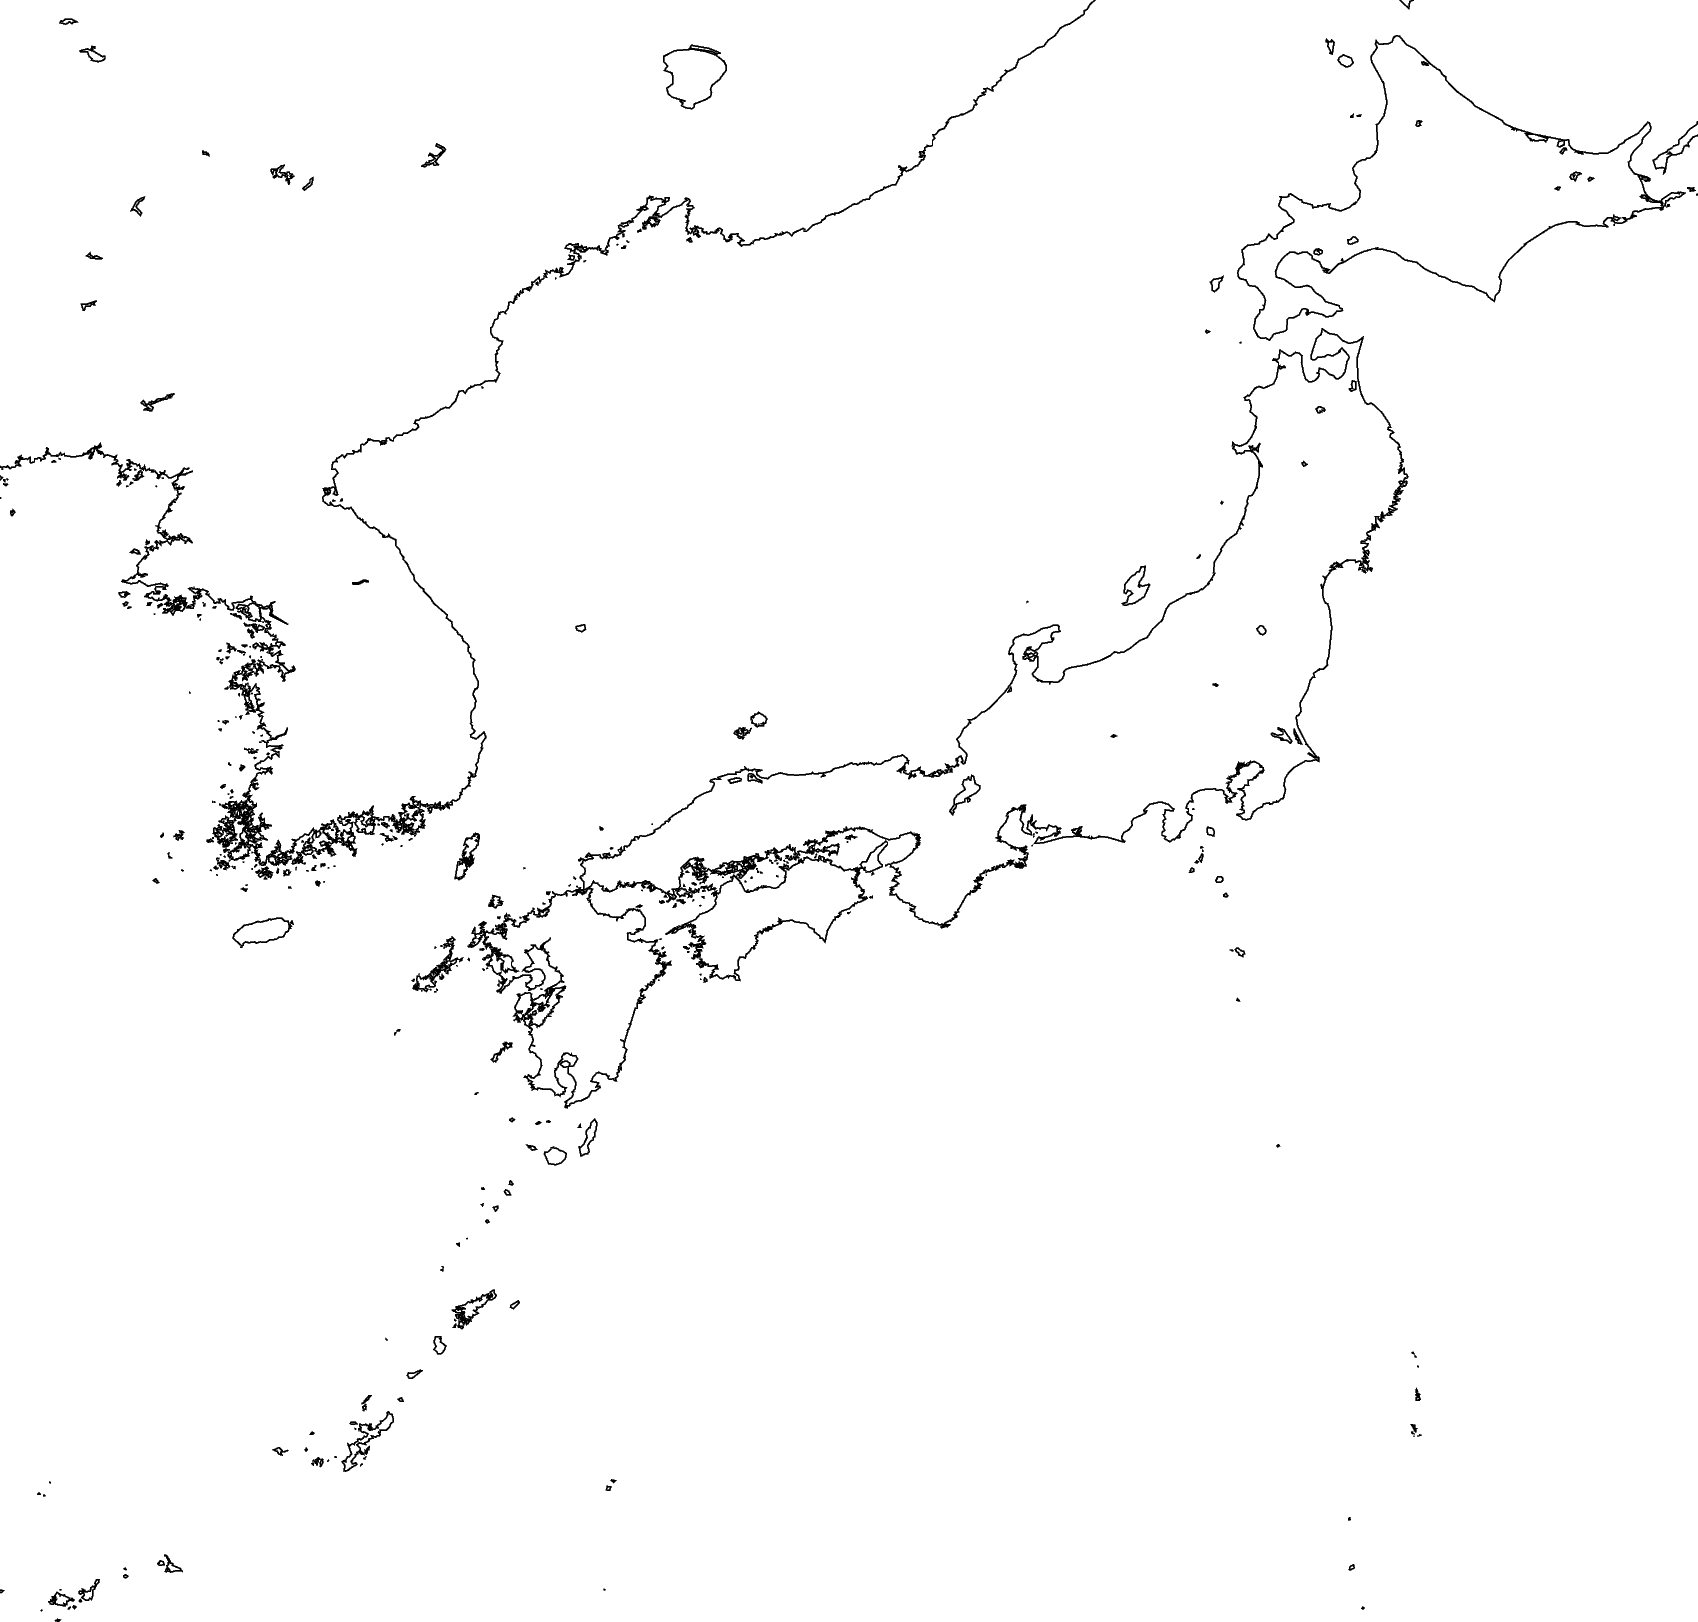

In [46]:
fig.show()

:::{seealso}
On Jupyter, `show` will embed a PNG of the figure directly into the notebook. But it can also open a PDF in an external viewer, which is probably what you want if you're using a plain Python script. See the documentation for [`pygmt.Figure.show`](https://www.pygmt.org/v0.6.1/api/generated/pygmt.Figure.show.html#pygmt.Figure.show) for more information.
:::

Beyond the outlines, we can also color the land and water regions to make them stand out. Lets start with the water.

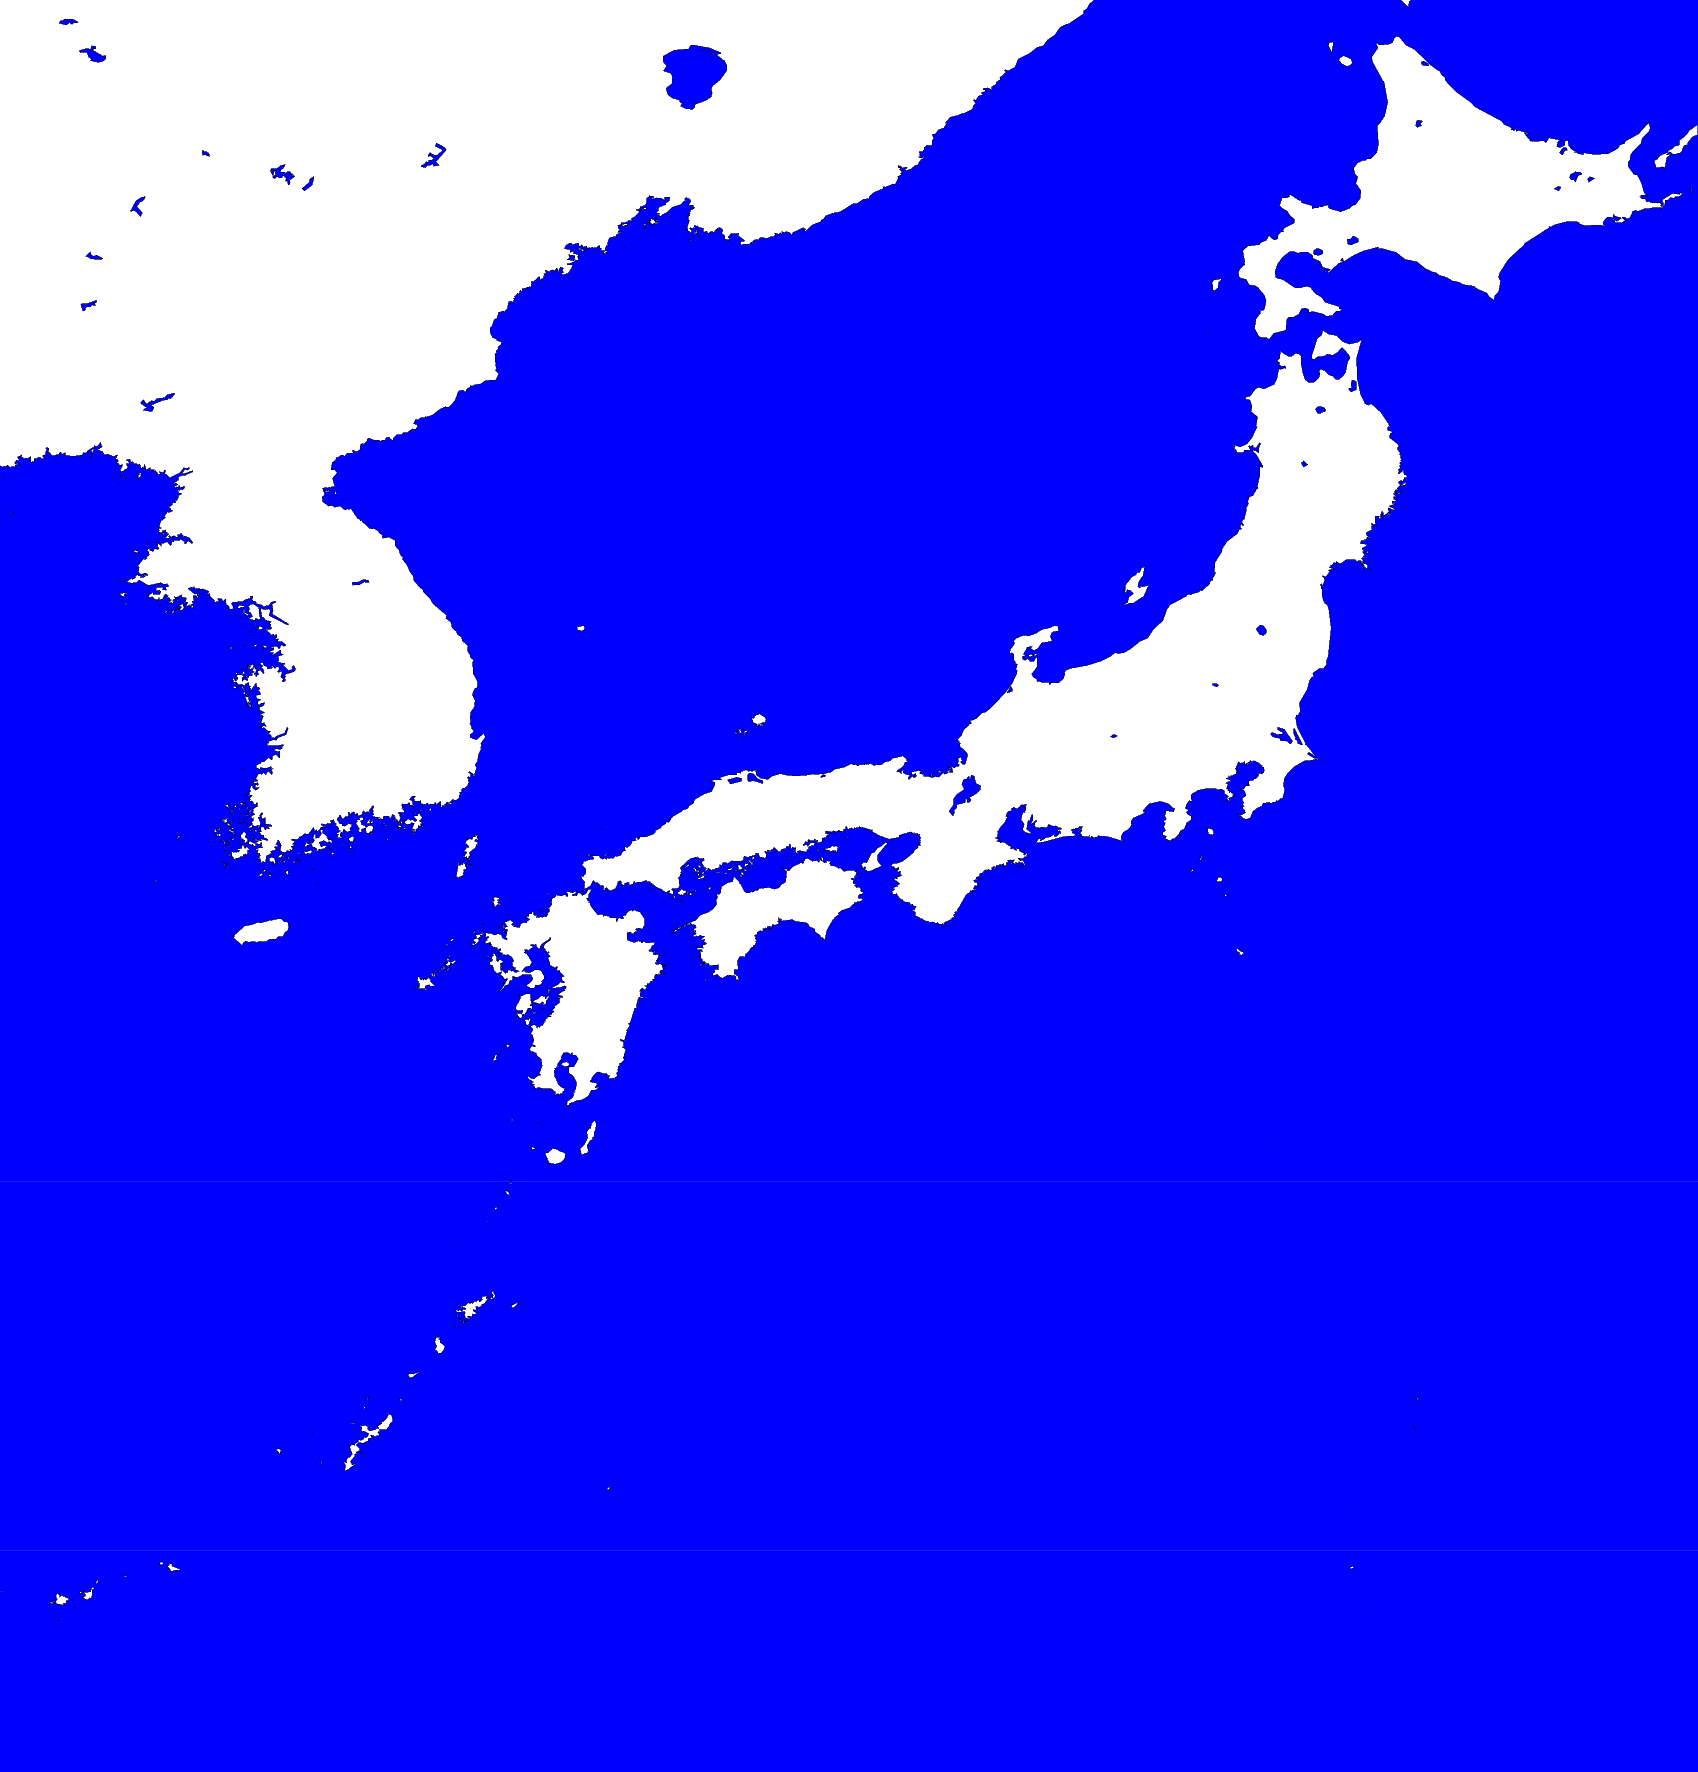

In [47]:
fig.coast(water="blue")
fig.show()

And now add the land in a light green color.

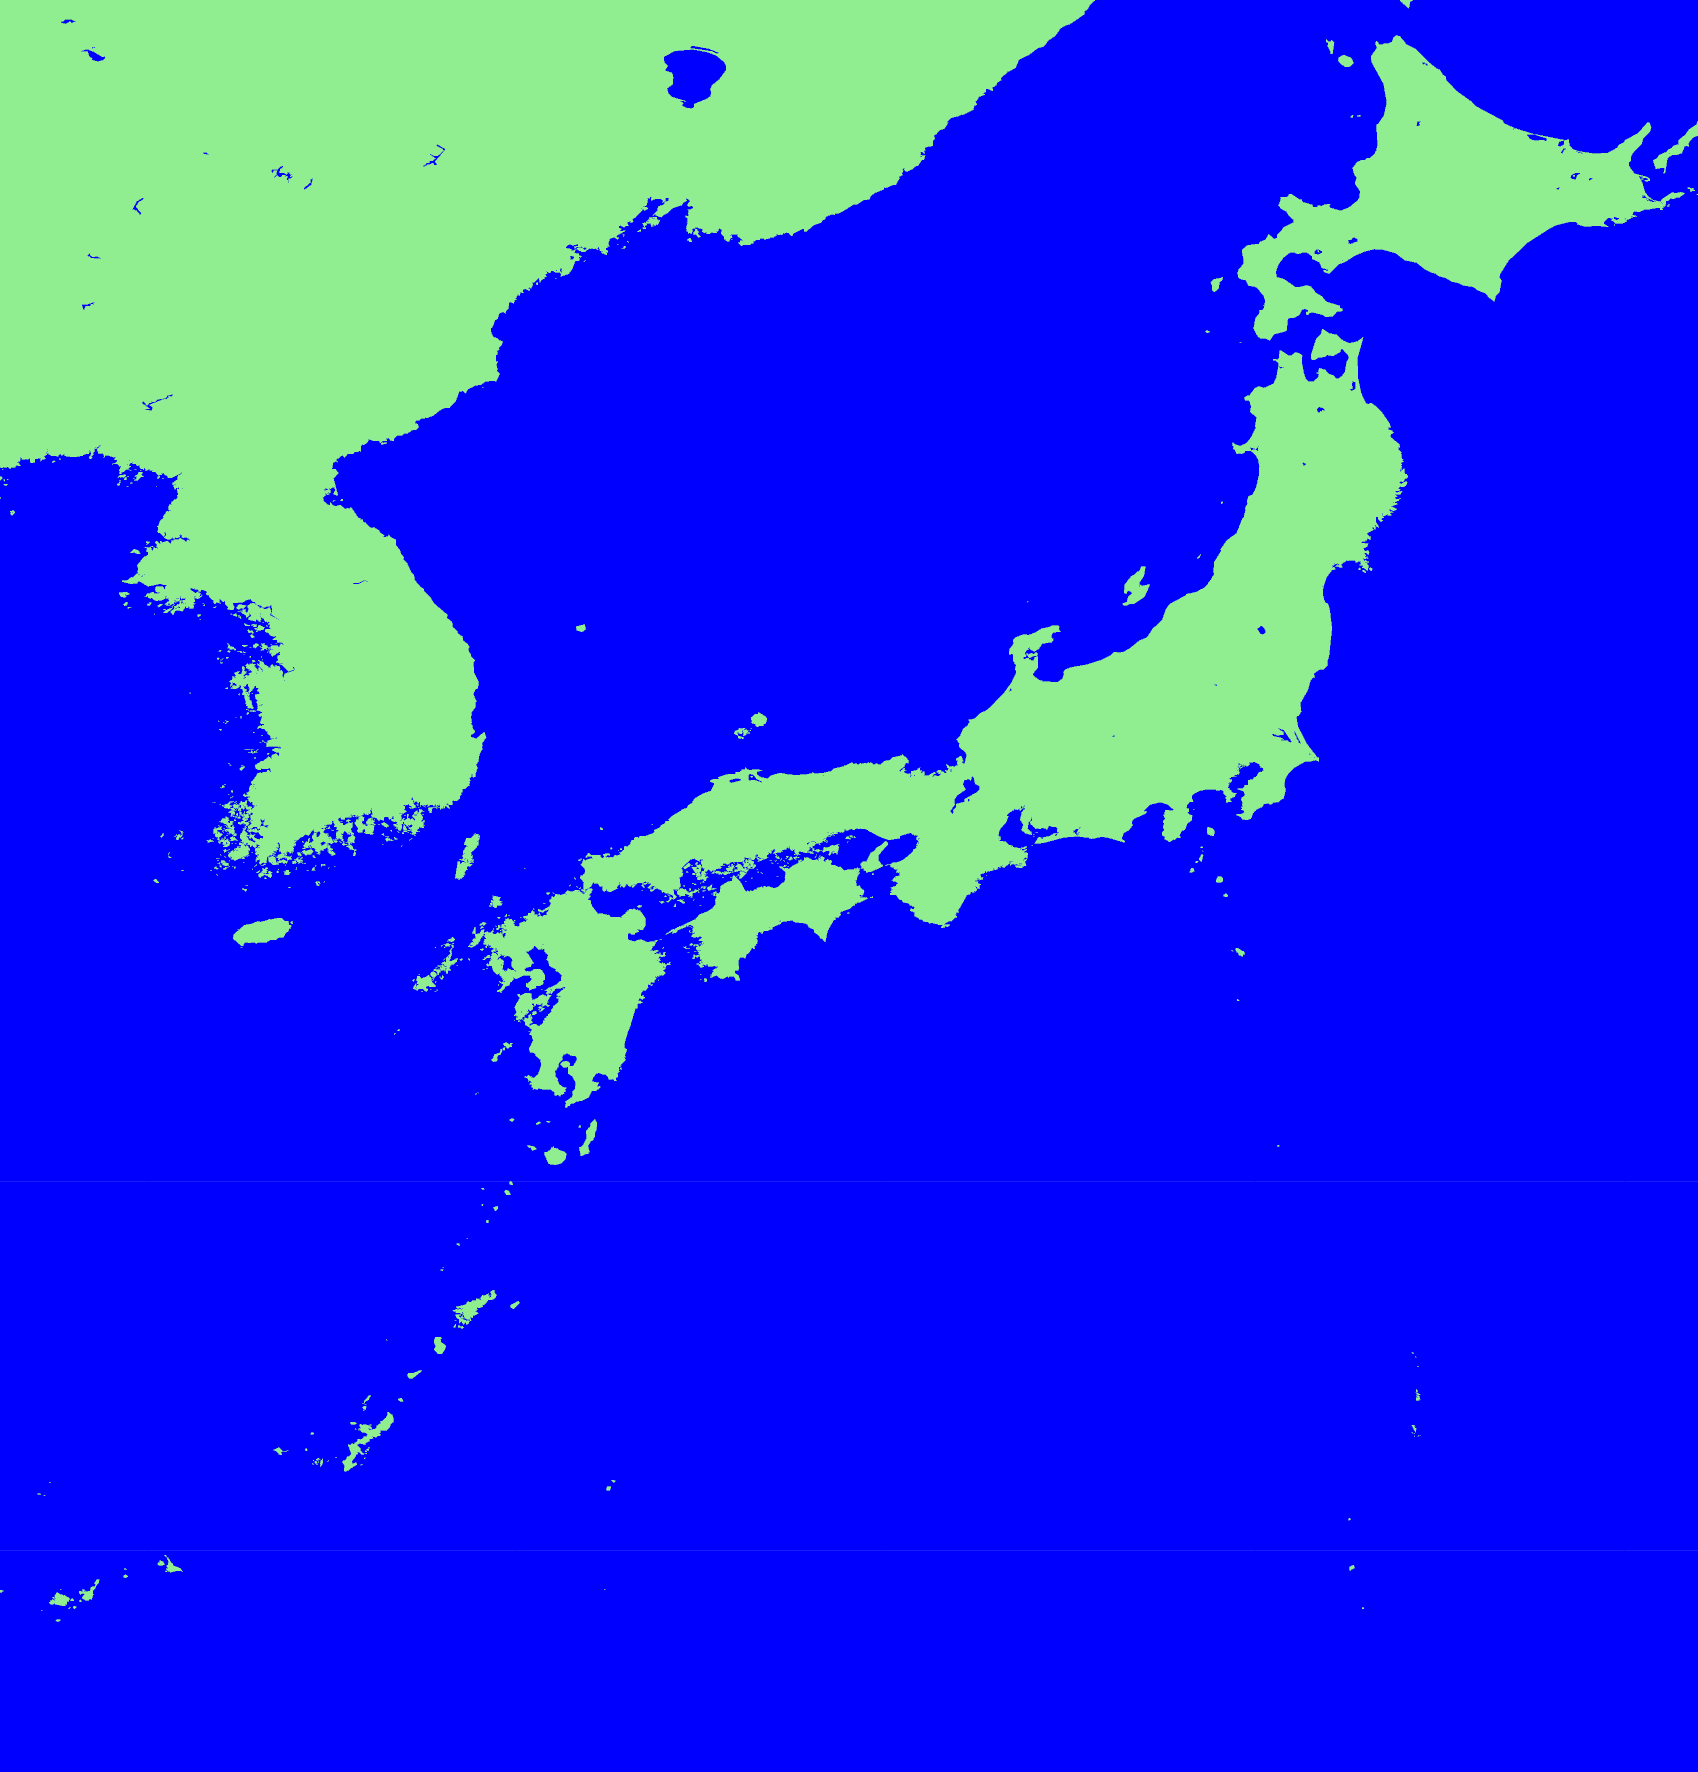

In [48]:
fig.coast(land="lightgreen")
fig.show()

A things to note here:

1. We added the colored land and water on top of what was already on our canvas (the shorelines), which means that they are still there but we don't see them because they are below the solid colors.
1. We didn't need to provide a `region` this time around because PyGMT remembers the last region that was provided. But you could provide one if you want to use a different value.

If we want to have a figure with the shorelines laid out on top of the solid colors, we can make a new figure and add them in the correct order.

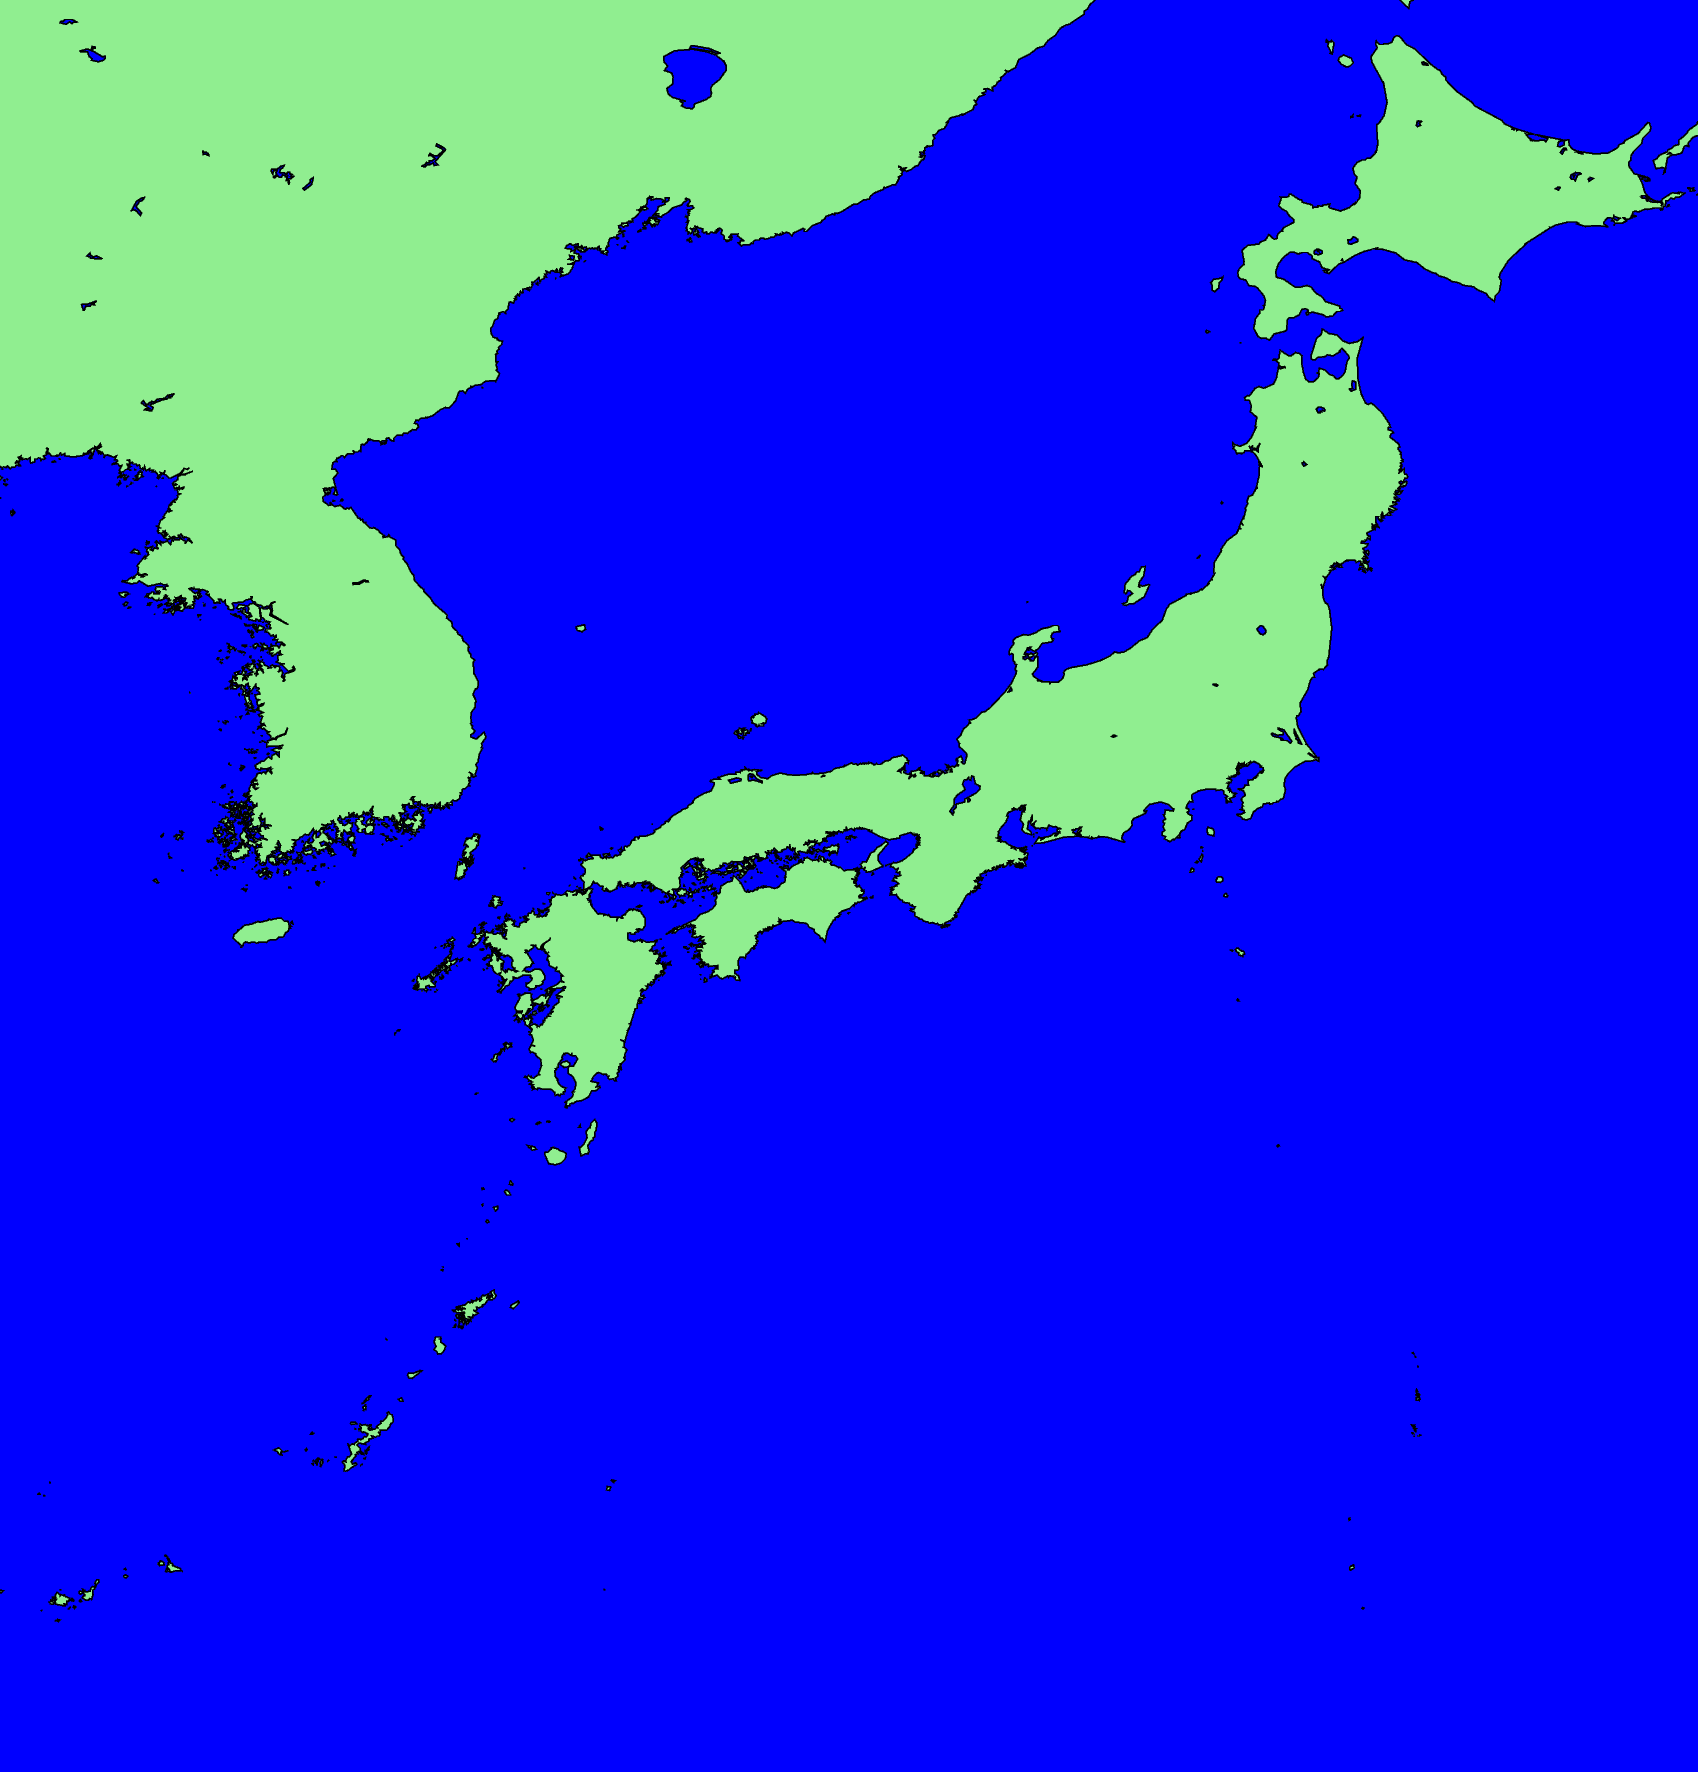

In [42]:
fig = pygmt.Figure()
# Plot the colored land and water first
fig.coast(region=region, land="lightgreen", water="blue")  # 👈🏽 we need to pass region to the first call
# Lay down the shorelines on top of them
fig.coast(shorelines=True) 
fig.show()

Alright, now we have a lovely figure with colored land and water plus some shorelines. But what are the coordinates associated with this map? Lets add a map frame to find out.